In [1]:
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1


In [4]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
from datetime import date

%matplotlib inline

In [9]:
# Limpieza de los datos homogenizando el uso de comillas
with open('./data/Data_Taller_1.csv', encoding="utf8") as f:
    data = re.sub(r'"""', '|', f.read())
    data = re.sub(r'""', '|', data)
    data = re.sub(r'"', '', data)
    data = re.sub(r'\|', '"', data)
    data = re.sub(r';', '', data)

with open('./data/Data_Taller_1_Limpia.csv', 'w', encoding="utf8") as f:
    f.write(data)

In [10]:
# Lectura de los datos en un dataframe
df = pd.read_csv("./data/Data_Taller_1_Limpia.csv", encoding="utf8")

In [11]:
# Observación inicial de los datos
df.head(80)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493.0,False,2000,78.0,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560.0,False,2000,NaN,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Destiny's Child,"Jumpin', Jumpin'",230200.0,False,1999,70.0,0.771,0.685,1,-4.639,1,0.0567,0.00543,0.001570,0.0537,0.683,88.997,"pop, R&B"
76,Céline Dion,That's the Way It Is,241373.0,False,1999,64.0,0.634,0.886,9,-5.424,1,0.0434,0.15400,0.000000,0.1180,0.577,93.040,pop
77,3 Doors Down,Kryptonite,233933.0,False,2000,78.0,0.545,0.865,11,-5.708,0,0.0286,0.00664,0.000011,0.1680,0.543,99.009,"pop, rock, metal"
78,Carl Thomas,I Wish,226760.0,False,2000,52.0,0.736,0.666,1,-4.929,1,0.0337,0.05930,0.000038,0.1070,0.224,89.824,"pop, R&B"


### Punto 1: artistas más activos en los últimos 10 años (2013-2022)
Supuesto: el criterio de "Activo" lo define la cantidad de canciones publicadas

In [12]:
# Calculo de los 10 artistas con más canciones publicadas en los últimos 10 años
ultimos_10_años = date.today().year - 10
top_artistas = df.loc[df['year'] > ultimos_10_años]['artist'].value_counts(dropna = False)[0:10]
print(top_artistas)

Drake               16
Ariana Grande       14
Calvin Harris       10
Taylor Swift        10
Selena Gomez         9
Ed Sheeran           9
Post Malone          9
The Weeknd           8
The Chainsmokers     8
Sam Smith            7
Name: artist, dtype: int64


<AxesSubplot:>

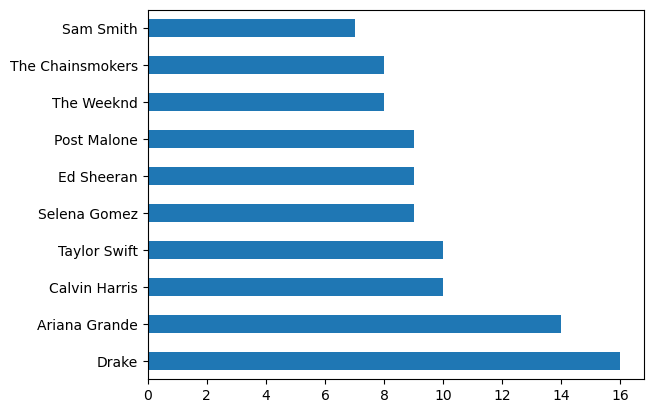

In [13]:
# Gráfica de los 10 artistas con más canciones publicadas en los últimos 10 años
top_artistas.plot(kind = 'barh')

### Punto 2: comparación de los géneros Latin y Folk/Acoustic en relación con su duración

In [14]:
# Resumen estadístico de la duración de las canciones del género latin
df[df['genre'].str.contains('latin', na=False)]['duration_ms'].describe()

count        64.000000
mean     227674.859375
std       39716.523777
min      166866.000000
25%      205630.000000
50%      223106.500000
75%      239842.750000
max      417920.000000
Name: duration_ms, dtype: float64

In [15]:
# Resumen estadístico de la duración de las canciones del género Folk/Acoustic
df[df['genre'].str.contains('Folk/Acoustic', na=False)]['duration_ms'].describe()

count        20.000000
mean     220183.650000
std       30164.904758
min      160097.000000
25%      203166.250000
50%      217846.500000
75%      238541.750000
max      278666.000000
Name: duration_ms, dtype: float64

In [16]:
# Diferencia del tiempo promedio de ambos géneros
mean_latin = df[df['genre'].str.contains('latin', na=False)]['duration_ms'].mean()
mean_folk = df[df['genre'].str.contains('Folk/Acoustic', na=False)]['duration_ms'].mean()
diferencia = mean_latin - mean_folk
print(diferencia)

7491.209375000006


De acuerdo con el resumen estadístico de ambos géneros, se puede observar que existe el triple de canciones del género latin respecto al género 'Folk/Acoustic'. Por otro lado, las canciones del género latin suelen ser más largas en términos de segundos, no representa una diferencia significativa a nivel de minutos. La diferencia entre el tiempo promedio de ambos géneros es de 7491ms. 

In [17]:
# Revision de si existen canciones que clasifiquen como latin y como Folk/Acoustic
# No se encontró alguna
df.loc[(df['genre'].str.contains('latin', na=False) == True) & (df['genre'].str.contains('Folk/Acoustic', na=False))== True]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


In [18]:
# Funcion que clasifica una canción dentro de las categorías de interés
def genero(x):
    x = str(x)
    if x.find('latin') != -1:
        return 'latin'
    elif x.find('Folk/Acoustic') != -1:
        return 'Folk/Acoustic'
    else:
        return 'NA'

In [20]:
# Creación de un dataframe temporal con las columnas de interés
df_tmp = df[['song', 'genre', 'duration_ms']]
df_tmp['genero'] = df_tmp['genre'].apply(genero)

C:\Users\aguer\AppData\Local\Temp\ipykernel_28364\1121930774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['genero'] = df_tmp['genre'].apply(genero)


<AxesSubplot:xlabel='genero', ylabel='duration_ms'>

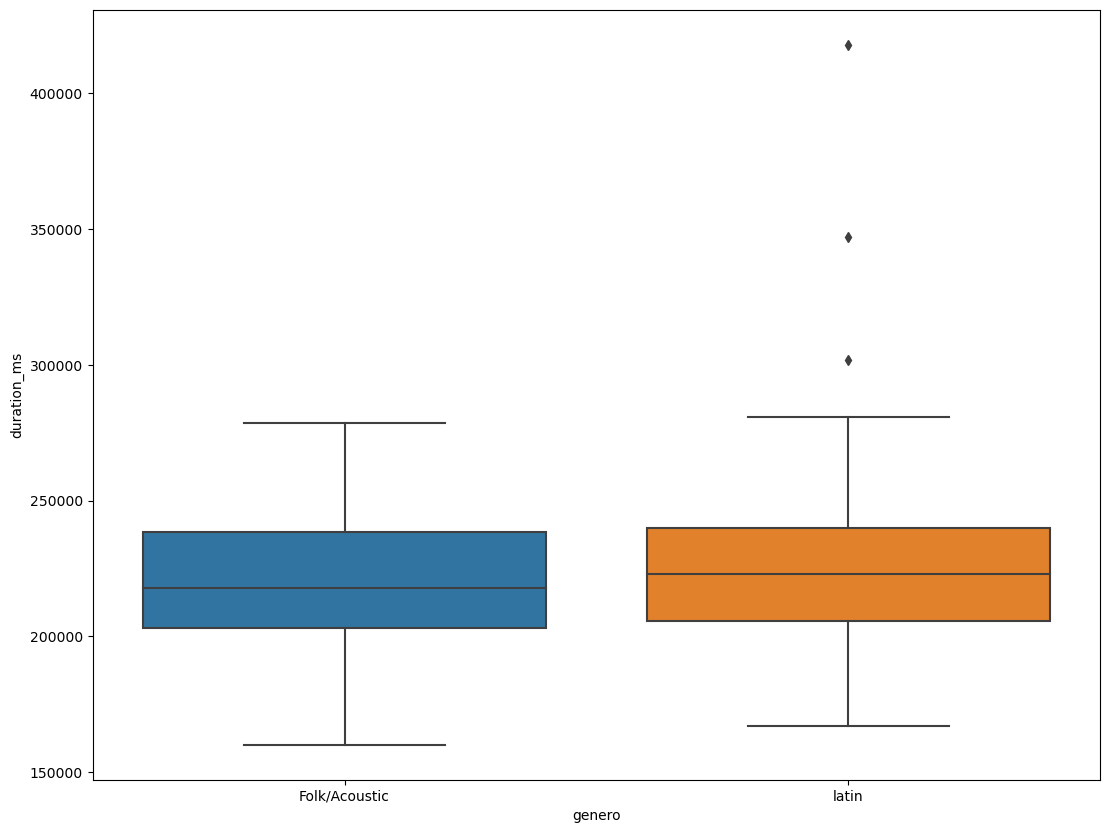

In [21]:
# Representación gráfica del comportamiento de la duración de las canciones de latin y Folk/Acoustic
plt.figure(figsize = (13, 10))
sns.boxplot(x = 'genero', y = 'duration_ms', data = df_tmp.loc[~df_tmp['genero'].isin(['NA'])])

Nuevamente, se observa que las canciones del género latin suelen ser más largas respecto a Folk/Acoustic, pero no representa una diferencia significativa. Por otro lado, en el caso del género latin se identifican algunas canciones que duran mucho más de lo usual.

### Punto 3 : top 5 de los géneros más populares en 2019 y su comportamiento
Supuesto: una canción que pertenece a más de un género musical, se contabiliza dentro de cada uno de los géneros a los cuales pertenece

In [22]:
# Creacion de dataframe de canciones separando cada canción en sus múltiples géneros musicales
df_tmp = df.copy()
df_tmp['genre'] = df_tmp['genre'].str.split(',')
df_tmp = df_tmp.explode('genre', ignore_index=True)
df_tmp['genre'] = df_tmp['genre'].str.strip()
df_tmp.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,rock
2,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,pop
3,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.251,0.278,136.859,pop
4,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.251,0.278,136.859,country


In [23]:
# Cálculo del top 5 de los géneros del 2019 según la cantidad de canciones
top_generos = df_tmp.loc[df_tmp['year'] == 2019]['genre'].value_counts(dropna = False)[0:5].reset_index(name="count")
top_generos

,index,count
0,pop,63
1,hip hop,38
2,Dance/Electronic,21
3,R&B,9
4,latin,8


<AxesSubplot:>

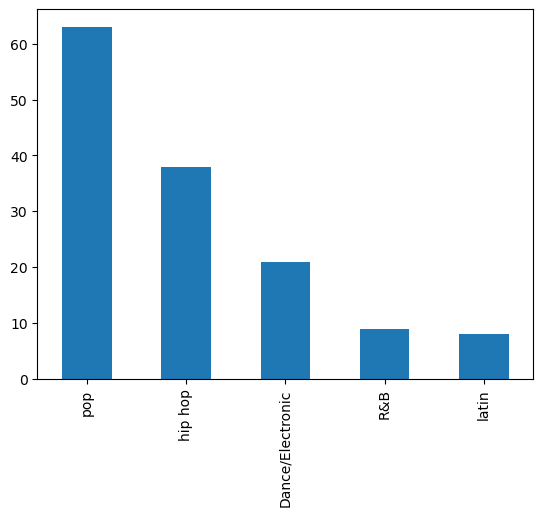

In [24]:
# Gráfica del top 5 de los géneros del 2019 según la cantidad de canciones
df_tmp.loc[df_tmp['year'] == 2019]['genre'].value_counts(dropna = False)[0:5].plot(kind='bar')

In [25]:
# Variación del top de canciones del 2019 en los años 2000, 2005, 2010, 2015, 2019
años = [2000, 2005, 2010, 2015, 2019]
top_generos_años = df_tmp.loc[(df_tmp['year'].isin(años)) & (df_tmp['genre'].isin(top_generos['index']))].groupby(['genre', 'year']).size().reset_index(name="count")
top_generos_años

,genre,year,count
0,Dance/Electronic,2000,5
1,Dance/Electronic,2005,5
2,Dance/Electronic,2010,28
3,Dance/Electronic,2015,28
4,Dance/Electronic,2019,21
5,R&B,2000,25
6,R&B,2005,31
7,R&B,2010,23
8,R&B,2015,21
9,R&B,2019,9


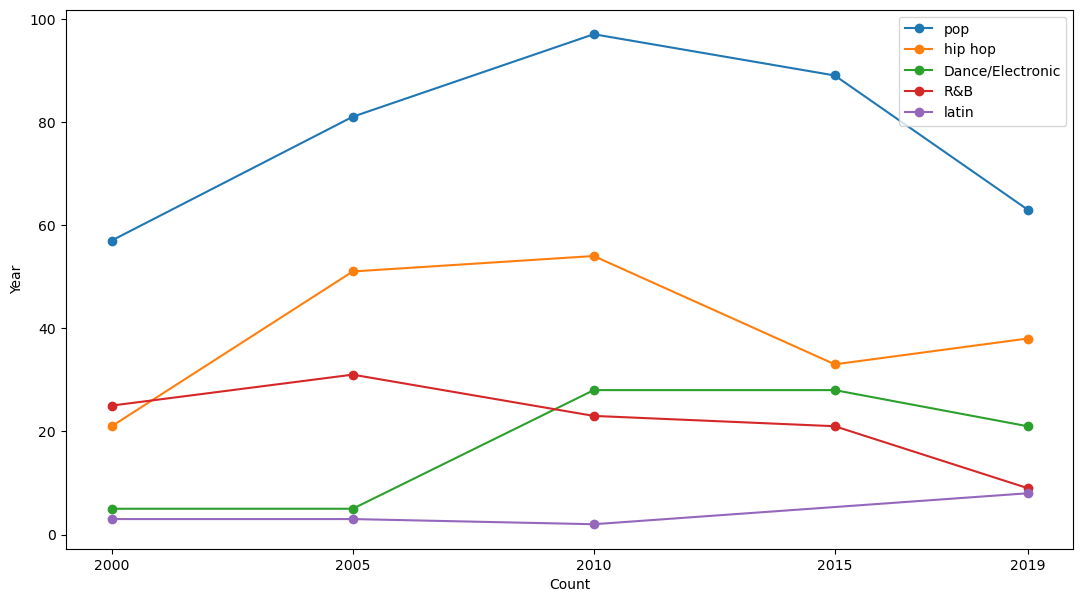

In [26]:
# Variación del top de canciones del 2019 en los años 2000, 2005, 2010, 2015, 2019
plt.figure(figsize = (13, 7))

for i in top_generos['index']:
    plt.plot(top_generos_años.loc[top_generos_años['genre'] == i]['year'], top_generos_años.loc[top_generos_años['genre'] == i]['count'], marker='o', linestyle='-', label=i)

plt.xlabel('Count')
plt.ylabel('Year')
plt.xticks(años)
plt.legend(loc = 'upper right')
plt.show()

En 2019, el top 5 de géneros musicales fue pop, hip hop, dance/electronic, R&B y latin. Dichos géneros musicales tuvieron el comportamiento que se aprecia en la gráfica previa. Excepto por el género R&B que disminuyó en popularidad con el paso del tiempo, desde el 2000 los otros géneros han crecido teniendo una mayor auge en el 2010.

### Punto 4: progresión de nuevos artistas

In [27]:
# Calculo del año en que un artista se consideró nuevo o apareció por primera vez
nuevos_artistas = df.groupby("artist").agg({"year":min}).reset_index()
nuevos_artistas

,artist,year
0,*NSYNC,2000
1,112,2001
2,2 Chainz,2013
3,21 Savage,2017
4,2Pac,2001
...,...,...
830,girl in red,2018
831,iann dior,2019
832,iio,2006
833,t.A.T.u.,2020


In [28]:
nuevos_artistas['year'].value_counts(dropna = False)

2001    60
2000    55
2017    44
2004    44
2003    42
2014    41
2019    41
2005    40
2016    40
2018    39
2002    39
2015    39
2006    38
2007    37
2010    35
2011    35
2012    34
2008    34
2013    33
2009    31
1999    30
2020     3
1998     1
Name: year, dtype: int64

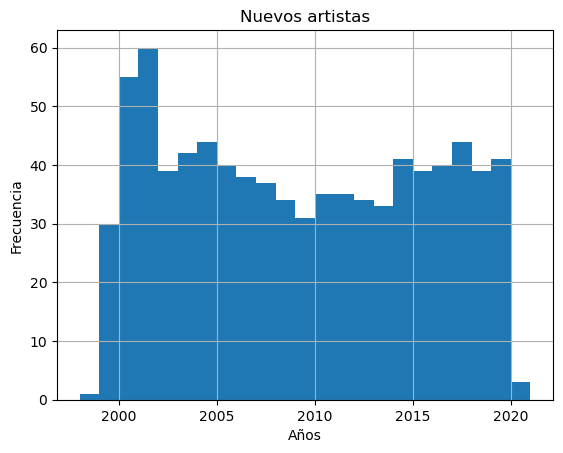

In [29]:
intervalos = range(min(nuevos_artistas['year']), max(nuevos_artistas['year']) + 2)
plt.hist(x=nuevos_artistas['year'], bins=intervalos)
plt.title('Nuevos artistas')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

### Punto 5: progresión de la popularidad
Supuesto: una canción que pertenece a más de un género musical, se contabiliza dentro de cada uno de los géneros a los cuales pertenece

In [30]:
# Cálculo del promedio de la popularidad desagregado por género musical y año
popularidad = df_tmp.groupby(['genre', 'year']).agg({"popularity":'mean'}).reset_index()
generos = popularidad['genre'].unique()
popularidad

,genre,year,popularity
0,Dance/Electronic,1999,57.000000
1,Dance/Electronic,2000,53.400000
2,Dance/Electronic,2001,56.833333
3,Dance/Electronic,2002,54.666667
4,Dance/Electronic,2003,52.600000
...,...,...,...
195,set(),2013,74.000000
196,set(),2014,73.000000
197,set(),2016,57.000000
198,set(),2018,67.000000


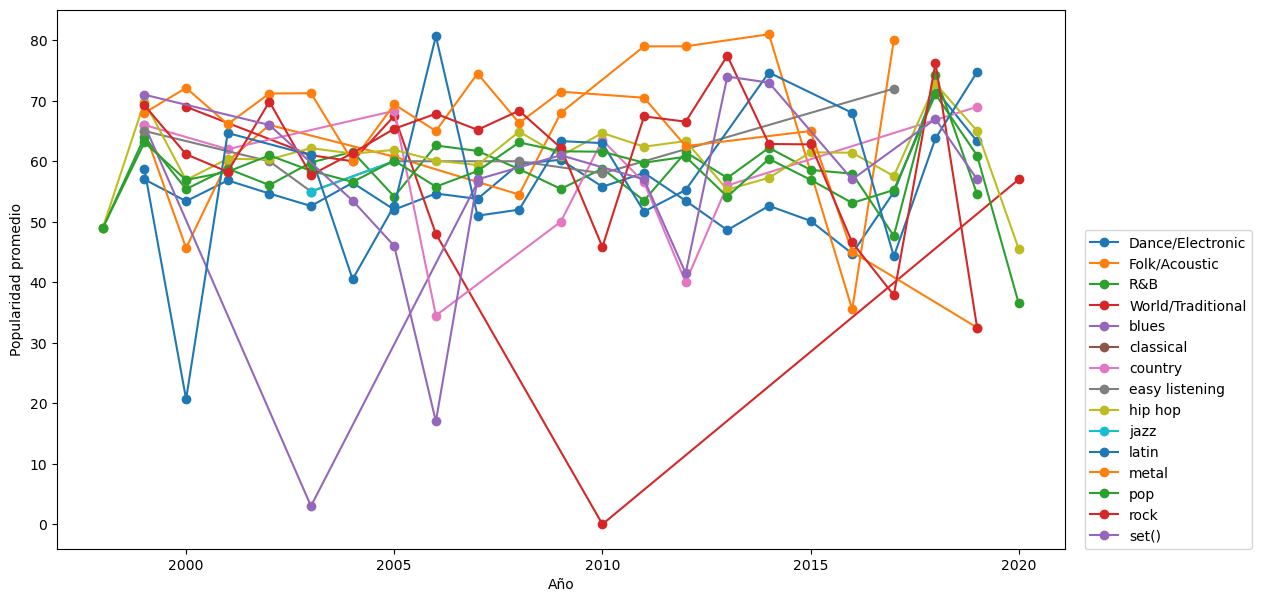

In [31]:
# Variación del promedio de la popularidad por año
plt.figure(figsize = (13, 7))

for i in generos:
    plt.plot(popularidad.loc[popularidad['genre'] == i]['year'], popularidad.loc[popularidad['genre'] == i]['popularity'], marker='o', linestyle='-', label=i)

plt.xlabel('Año')
plt.ylabel('Popularidad promedio')
plt.legend(loc=(1.02, 0))
plt.show()

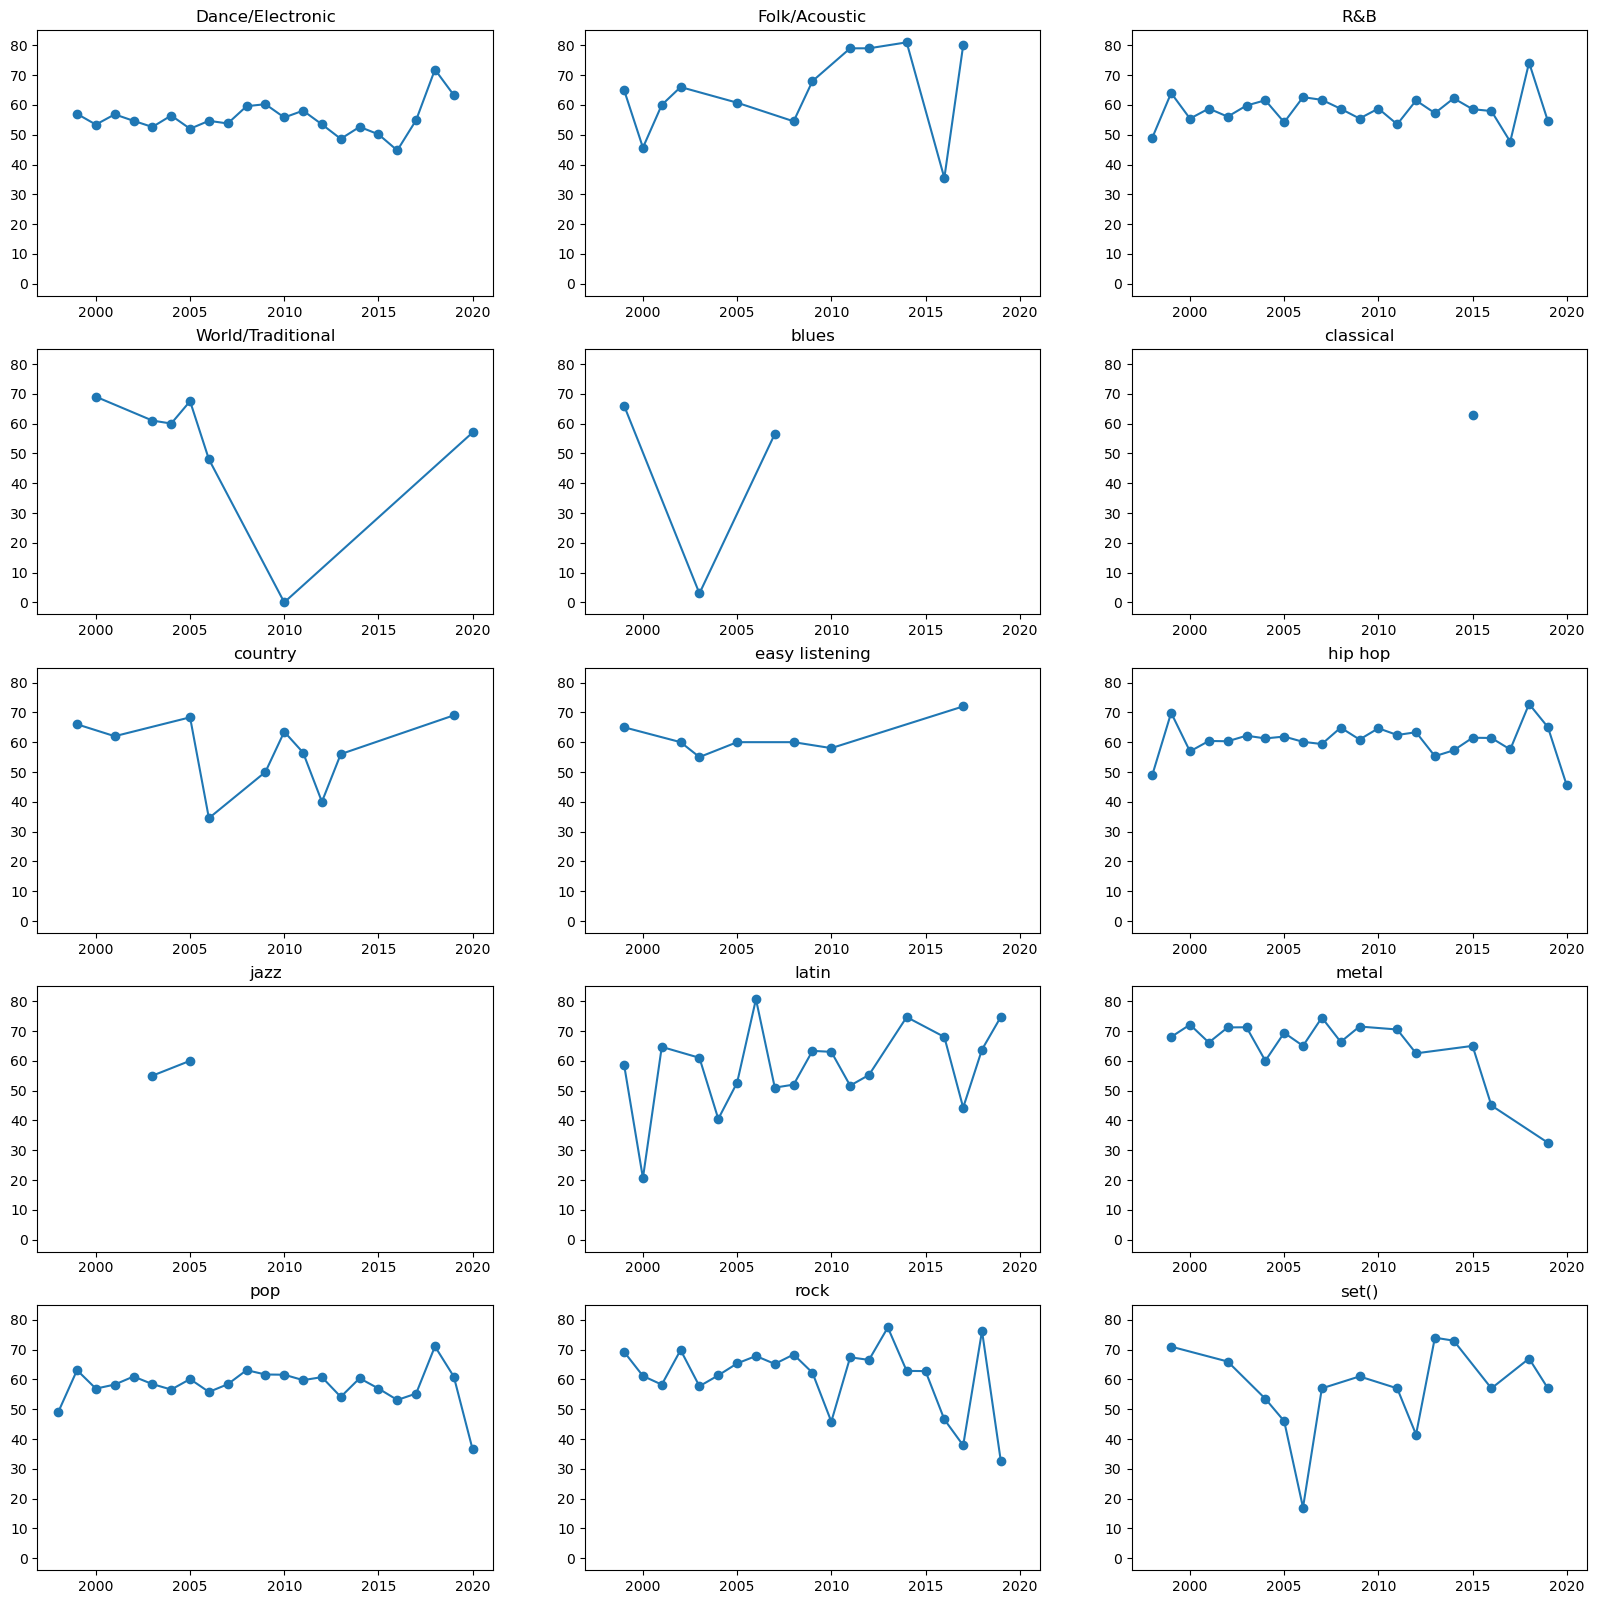

In [32]:
# Variación del promedio de la popularidad desagregado por género musical y año
col = 3
rows = int(np.ceil(len(generos)/col))
figure, axis = plt.subplots(rows, col, figsize=(20, 20), sharex='all', sharey='all')
j=0

for i in generos:
    x, y = int(j/col), int(j%col)
    axis[x, y].plot(popularidad.loc[popularidad['genre'] == i]['year'], popularidad.loc[popularidad['genre'] == i]['popularity'], marker='o')
    axis[x, y].set_title(i)
    axis[x, y].xaxis.set_tick_params(which='both', labelbottom=True)
    axis[x, y].yaxis.set_tick_params(which='both', labelbottom=True)
    j += 1

plt.show()

A partir de las gráficas anteriores, se puede concluir que los géneros Dance, R&B, hip hop y rock se han mantenido populares con el paso del tiempo, aunque bien pueden fluctuar. Sin embargo, géneros como Blues, classical y jazz no tienen muchas canciones y no son tan populares.

### Punto 6: comparación de los géneros Pop y Rock

In [33]:
# Comparación estadística de los géneros Pop y Rock
descripcion = df_tmp.loc[df_tmp['genre'].isin(['pop', 'rock'])].groupby('genre')[['energy', 'valence', 'tempo']].describe().unstack(1).reset_index().pivot(index=['genre', 'level_0'], values=0, columns='level_1')
descripcion

level_1             25%       50%        75%   count      max        mean  \
genre level_0                                                               
pop   energy     0.6180    0.7310    0.83100  1633.0    0.999    0.714803   
      tempo     98.9935  120.0125  133.01475  1632.0  210.851  119.663785   
      valence    0.3900    0.5585    0.73575  1632.0    0.973    0.553979   
rock  energy     0.7120    0.8300    0.90400   233.0    0.988    0.792107   
      tempo    104.6550  124.5990  144.07200   233.0  199.935  125.928446   
      valence    0.3650    0.5280    0.71300   233.0    0.965    0.525401   

level_1            min        std  
genre level_0                      
pop   energy    0.0549   0.151182  
      tempo    60.0190  26.460408  
      valence   0.0381   0.221282  
rock  energy    0.3160   0.139803  
      tempo    68.9760  27.836772  
      valence   0.0681   0.218178

<AxesSubplot:xlabel='genre', ylabel='energy'>

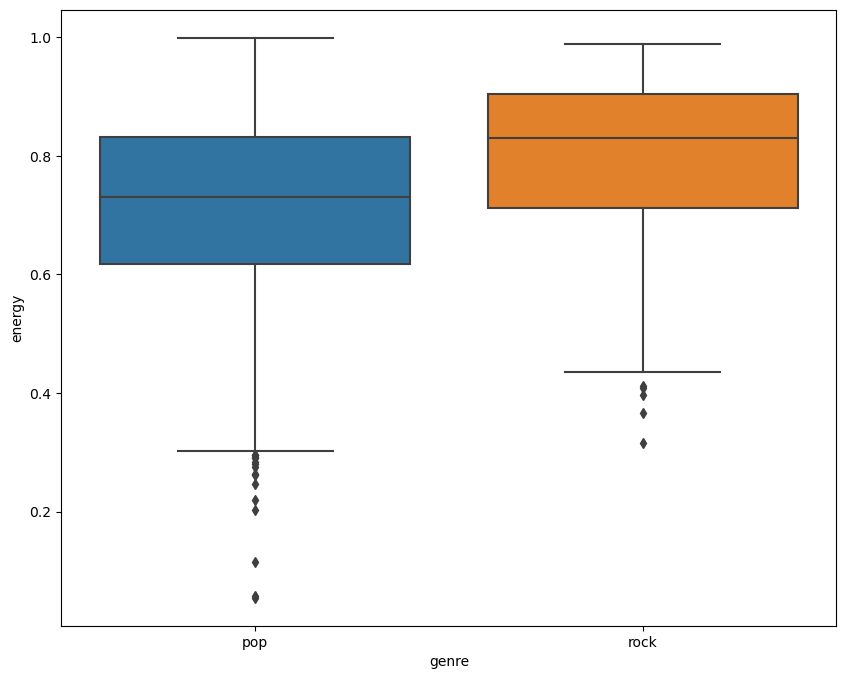

In [34]:
# Representación gráfica de la variable energy para los géneros Pop y Rock
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'genre', y = 'energy', data = df_tmp.loc[df_tmp['genre'].isin(['pop', 'rock'])])

<AxesSubplot:xlabel='genre', ylabel='valence'>

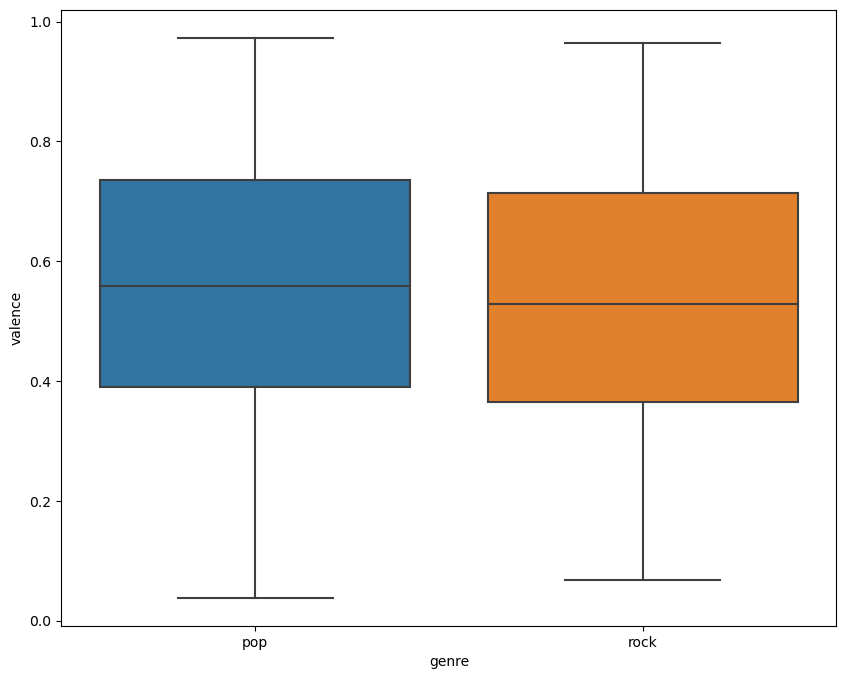

In [35]:
# Representación gráfica de la variable valence para los géneros Pop y Rock
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'genre', y = 'valence', data = df_tmp.loc[df_tmp['genre'].isin(['pop', 'rock'])])

<AxesSubplot:xlabel='genre', ylabel='tempo'>

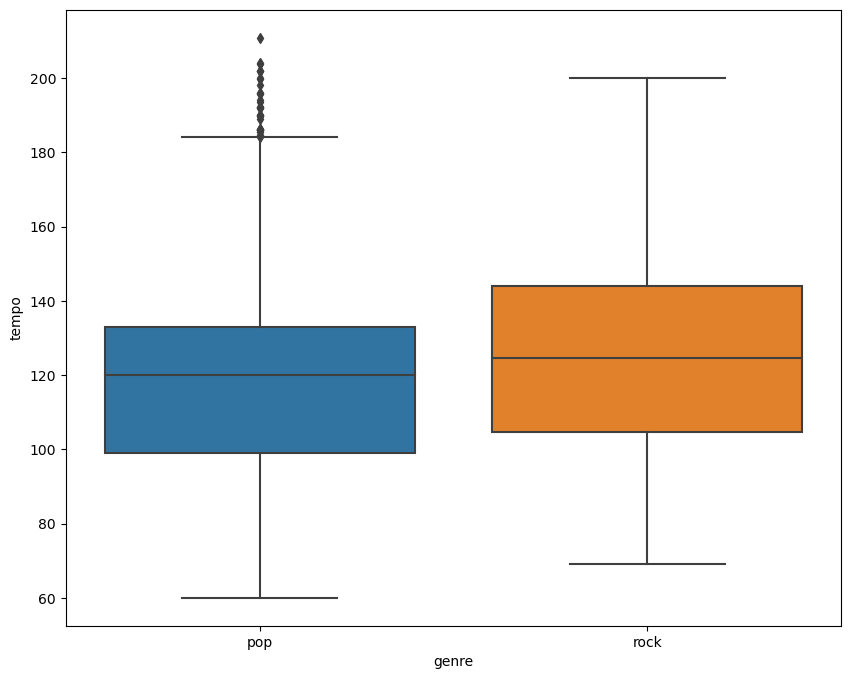

In [36]:
# Representación gráfica de la variable tempo para los géneros Pop y Rock
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'genre', y = 'tempo', data = df_tmp.loc[df_tmp['genre'].isin(['pop', 'rock'])])

De las tres gráficas anteriores que comparan los géneros pop y rock, se puede concluir que el género rock tiene una mayor energía o intensidad y se caracteriza por tener una mayor cantidad de pulsaciones por minuto (Tempo). Sin embargo, ambos géneros no se diferencian mucho en su valence o percepción de positividad musical.